

Disciplina: Inteligência Artificial


Aluno: LUIZ YOKOYAMA FELIX DE SOUZA

---

**INSTRUÇÕES DE USO DESTE NOTEBOOK:     /LUIZ**

**Executar os blocos de códigos, um a um.**

O ARQUIVO DA BASE DE DADOS PODE SER OBTIDO EM: https://www.kaggle.com/arjunjoshua/predicting-fraud-in-financial-payment-services

COMO O ARQUIVO DA BASE DE DADOS É MUITO GRANDE, RECOMENDA-SE O SEU ACESSO DIRETO PELO GOOGLE DRIVE.

NO PRIMEIRO BLOCO APARECE UM LINK PARA GERAR UM CÓDIGO DE AUTORIZAÇÃO DE ACESSO AO GOOGLE DRIVE.

**Mantenha o arquivo PS_20174392719_1491204439457_log.csv na raíz de seu Google Drive.**


In [ ]:
#EXECUTE O CÓDIDO PARA PERMITIR O ACESSO AOS ARQUIVOS DE SEU GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/My Drive/PS_20174392719_1491204439457_log.csv')

# ANÁLISE DA BASE DE DADOS



LINK DA DESCRIÇÃO DA BASE DE DADOS 
https://www.kaggle.com/arjunjoshua/predicting-fraud-in-financial-payment-services

**Descrição**

**Contexto**

Um conjunto de dados sintético gerado usando o simulador chamado PaySim como uma abordagem para o problema de crimes bancários. PaySim usa dados agregados do conjunto de dados privado para gerar um conjunto de dados sintético que se assemelha à operação normal de transações e injeta comportamento malicioso para avaliar posteriormente o desempenho dos métodos de detecção de fraude.

**Conteúdo**

PaySim simula transações de dinheiro móvel com base em uma amostra de transações reais extraídas de um mês de registros financeiros de um serviço de dinheiro móvel implementado em um país africano. Os logs originais foram fornecidos por uma empresa multinacional, que é a provedora do serviço financeiro móvel que atualmente opera em mais de 14 países em todo o mundo.

O PaySim foi executado várias vezes usando sementes aleatórias em 744 etapas. O resultado final de uma execução contém aproximadamente 24 milhões de registros financeiros divididos em 5 tipos de categorias: CASH-IN, CASH-OUT, DÉBITO, PAGAMENTO e TRANSFERÊNCIA.
Este conjunto de dados sintético foi reduzido em 1/4 e disponibilizado apenas para o Kaggle.

**Cabeçalhos**

step - mapeia uma unidade de tempo no mundo real. Neste caso, 1 etapa equivale a 1 hora. Total de etapas 744 (simulação de 30 dias). representando cada hora de um mês em tempo real, que corresponde aos registros originais.

type - para este campo, os valores descritos como 'CASH-IN' e 'CASH-OUT',  estão errados. Na verdade consta na base de dados: 'CASH_IN' e 'CASH_OUT'.

type -  os demais possíveis valores deste campo são 'DEBIT', 'PAYMENT' e 'TRANSFER'.

traduções/explicações:

tipo - DEPÓSITO, ENTRADA DE DINHEIRO, SAÍDA DE DINHEIRO, PAGAMENTO e TRANSFERÊNCIA;

montante - valor da transação em moeda local;

nameOrig - cliente que iniciou a transação

oldbalanceOrg - saldo inicial da conta de origem, antes da transação;

newbalanceOrig - novo saldo da conta de origem, após a transação;

nameDest - cliente que é o destinatário da transação;

oldbalanceDest - saldo inicial do  antes da transação;

newbalanceDest - novo saldo do destinatário após a transação;


isFraud - São as transações feitas pelos agentes fraudulentos dentro da simulação;

isFlaggedFraud - O modelo de negócios visa controlar as transferências massivas de uma conta para outra e deveria sinalizar como tentativas ilegais as operações acima de 200.000.




   

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#Verifica se tem buracos /LUIZ
if df.isnull().values.any():
  print('Existem buracos')
else:
  print('A BASE DE DADOS NÃO TEM "BURACOS"')

A BASE DE DADOS NÃO TEM "BURACOS"


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


#ANÁLISE DAS SINALISAÇÕES DE POSSÍVEL FRAUDE (isFlaggedFraud) e FRAUDES CONFIRMADAS (isFraud) - BOOLEANAS /LUIZ

In [ ]:
# VER QUANTIDADE DE SINALIZAÇÕES DE FRAUDE   \LUIZ
np.sum(df.isFlaggedFraud)

16

In [ ]:
# VER QUANTIDADE DE FRAUDES QUE REALMENTE OCORRERAM   \LUIZ
qtdf = np.sum(df.isFraud)
qtdf

8213

In [ ]:
# VER QUANTIDADE DE FRAUDES QUE REALMENTE OCORRERAM QUE FORAM SINALIZADAS   \LUIZ
np.sum(df.isFraud & df.isFlaggedFraud)

16

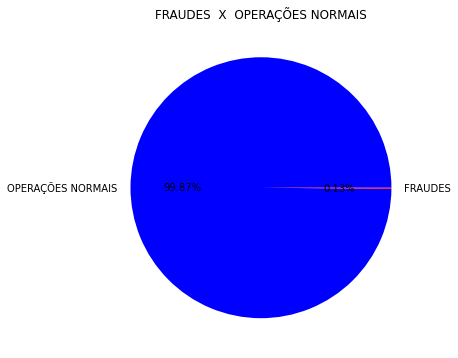

In [ ]:
#gráfico de quantidade fraudes  X demais OPERAÇÕES   /LUIZ
plt.rcParams['figure.figsize'] = (6,6)
plt.pie([6362620-qtdf, qtdf], labels=['OPERAÇÕES NORMAIS', 'FRAUDES'], colors=['blue', 'red'], autopct=lambda p: '{:.2f}'.format(p * 100.0 / 100)+'%')
plt.title('FRAUDES  X  OPERAÇÕES NORMAIS')
plt.show()

In [ ]:
# QUANDIDE DE OPERAÇÕES COM MONTANTE >= A 200.000 E QUE NÃO FORAM SINALIZADAS
q200 = df.query('((amount >= 200000) and (isFlaggedFraud != 1)) ').count().step
q200

1673554

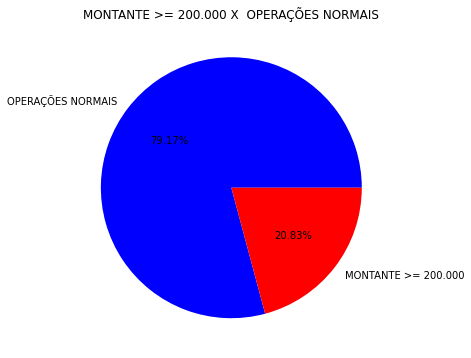

In [ ]:
#gráfico  MONTANTE >= 200.000 X  OPERAÇÕES NORMAIS   /LUIZ
plt.rcParams['figure.figsize'] = (6,6)
plt.pie([6362620, q200], labels=['OPERAÇÕES NORMAIS', 'MONTANTE >= 200.000'], colors=['blue', 'red'], autopct=lambda p: '{:.2f}'.format(p * 100.0 / 100)+'%')
plt.title('MONTANTE >= 200.000 X  OPERAÇÕES NORMAIS')
plt.show()

In [ ]:
# MOSTRA AS SINALIZAÇÕES DE FRAUDE   \LUIZ
df.query(' (isFlaggedFraud == 1)')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


**SOBRE A SINALISAÇÃO DE SUSPEITA DE FRAUDE**     /LUIZ

Apesar de sinalizar de possibilidade de fraude sempre ter acertado a fraude,
a sinalização de fraude só foi levantada 16 vezes dentre os 6.362.620 registros. Existem muitas operações com montantes superiores à 200.000 que não foram sinalizadas.
Portanto esta sinalização não tem consistência, nem representatividade e, então, pode ser descartada do modelo a ser implementado.

# Análise de operações      /LUIZ

In [ ]:
# QUANTIDADE DE FRAUDES COM OPERAÇÃO DE CASH_IN    /LUIZ
e = np.sum((df.type == 'CASH_IN') & df.isFraud); e

0

In [ ]:
# QUANTIDADE DE FRAUDES COM OPERAÇÃO DE CASH_OUT  /LUIZ
s = np.sum((df.type == 'CASH_OUT') & df.isFraud); s

4116

In [ ]:
# QUANTIDADE DE FRAUDES COM OPERAÇÃO DE DEBIT  /LUIZ
d = np.sum((df.type == 'DEBIT') & df.isFraud); d

0

In [ ]:
# QUANTIDADE DE FRAUDES COM OPERAÇÃO DE PAYMENT  /LUIZ
p = np.sum((df.type == 'PAYMENT') & df.isFraud); p

0

In [ ]:
# QUANTIDADE DE FRAUDES COM OPERAÇÃO DE TRANSFER  /LUIZ
t = np.sum((df.type == 'TRANSFER') & df.isFraud); t

4097

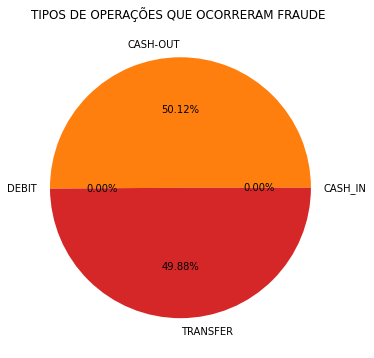

In [ ]:
#gráfico  TIPOS DE OPERAÇÕES QUE OCORRERAM FRAUDE   /LUIZ
plt.rcParams['figure.figsize'] = (6,6)
plt.pie([e, s, d, t], labels=['CASH_IN', 'CASH-OUT','DEBIT' , 'TRANSFER'], autopct=lambda p: '{:.2f}'.format(p * 100.0 / 100)+'%')
plt.title('TIPOS DE OPERAÇÕES QUE OCORRERAM FRAUDE ')
plt.show()

 **NOTA-SE QUE SÓ OCORRERAM FRAUDES COM AS OPERAÇÕES DE TRANSFER E CASH_OUT**   /LUIZ
 
 

In [ ]:
dfFraud = df.loc[df.isFraud == 1]
dfFraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


NOTA-SE QUE NA MAIORIA DAS VEZES, AS OPERAÇÕES DE FRAUDE OCORREM EM PARES DE "TRANSFER" E "CASH_OUT".   /LUIZ

EMBORA EXISTAM ALGUMAS OCORRÊNCIAS DE FRAUDES COM "CASH_OUT" OU "TRANSFER" ISOLADAMENTE.

In [ ]:
dfTransfer  = dfFraud.loc[df.type == 'TRANSFER']

In [ ]:
# QUANTIDADE DE TRANSFERÊNCIAS FRAUDOLENTAS QUE NÃO RESULTARAM EM SALDOS ZEROS NA CONTA DE DESTINO  /LUIZ
np.sum((dfTransfer.oldbalanceDest != 0) | (dfTransfer.newbalanceDest != 0))

29

In [ ]:
# MOSTRA AS TRANSFERÊNCIAS QUE NÃO RESULTARAM EM SALDOS ZEROS NA CONTA DE DESTINO  /LUIZ
dfTransfer.query(' (oldbalanceDest != 0 or newbalanceDest != 0)')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6706,6,TRANSFER,17246.00,C1034673425,17246.00,0.00,C1379589736,0.00,101717.84,1,0
7154,6,TRANSFER,13704.00,C1735554279,13704.00,0.00,C12793273,0.00,1658746.09,1,0
18771,8,TRANSFER,222.00,C1961506277,222.00,0.00,C378841819,0.00,267095.19,1,0
25875,8,TRANSFER,1078013.76,C1026280121,0.00,0.00,C277510102,0.00,970749.68,1,0
47144,9,TRANSFER,350705.74,C1452168793,350705.74,0.00,C399194578,0.00,1184633.07,1,0
49825,9,TRANSFER,2539898.07,C394488466,2539898.07,0.00,C575638324,0.00,261290.69,1,0
49885,9,TRANSFER,361559.69,C1287719145,361559.69,0.00,C352239275,0.00,141302.12,1,0
56477,9,TRANSFER,1154353.99,C670587931,1154353.99,0.00,C150406565,0.00,10872.90,1,0
60853,9,TRANSFER,994453.20,C1121789613,1437370.87,442917.67,C254839817,194812.76,665743.67,1,0
102607,10,TRANSFER,9217.19,C184586799,9217.19,0.00,C812377986,0.00,96795.60,1,0


PROVAVELMENTE OS SALDOS DAS CONTAS DE DESTINO ESTÃO ZERADOS POR FALTA DE CADASTRO DA INFORMAÇÃO MESMO.   /LUIZ

PORTANTO, A MAIORIA DAS FRAUDES COM TRANSFERÊNCIA NÃO TEM INFORMAÇÕES SOBRE OS SALDOS DAS CONTAS DE DESTINO.

SOMENTE 29 DE 4097 TRANSFERÊNCIAS APRESENTARAM VALORES PARA OS SALDOS DE DESTINO, MAS OS VALORES NÃO TEM CORRESPONDÊNCIA
COM OS VALORES TRANSFERIDOS. PORTANTO, OU ESTÃO FALTANDO OU ESTÃO ERRADOS.

In [ ]:
# MOSTRA AS TRANSFERÊNCIAS DE SALDO ZERO NO DESTINO QUE NÃO SÃO FRAUDES   /LUIZ
df.query('(type == "TRANSFER" and (oldbalanceDest == 0 or newbalanceDest == 0) and isFraud != 1 )')
# EXISTEM MUITAS OUTRAS TRANSFERÊNCIAS QUE POSSUEM SALDOS DE DESTINO ERRADOS E NÃO SÃO FRAUDES

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,C1670993182,705.0,0.00,C1100439041,22425.00,0.00,0,0
80,1,TRANSFER,17231.46,C1243171897,0.0,0.00,C783286238,24672.00,0.00,0,0
82,1,TRANSFER,224606.64,C873175411,0.0,0.00,C766572210,354678.92,0.00,0,0
86,1,TRANSFER,554026.99,C1603696865,0.0,0.00,C766572210,579285.56,0.00,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362076,718,TRANSFER,6991.38,C951478923,21547.0,14555.62,C2006411056,0.00,6991.38,0,0
6362124,718,TRANSFER,113826.86,C448540919,99349.0,0.00,C895719835,0.00,113826.86,0,0
6362136,718,TRANSFER,162431.60,C558504539,71315.0,0.00,C477069651,0.00,162431.60,0,0
6362151,718,TRANSFER,141375.27,C927100278,22377.0,0.00,C1765610550,0.00,141375.27,0,0


In [ ]:
dfCashOut = dfFraud.loc[df.type == 'CASH_OUT']
dfCashOut

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


SE A OPERAÇÃO É SAÍDA DE DINHEIRO, TAMBÉM PODE ESTAR OCORRENDO TRANSFERÊNCIA DE DINHEIRO PARA OUTRA CONTA.
EMBORA OS SALDOS DE DESTINO POSSAM APRESENTAR INCONSISTÊNCIAS DE VALORES COM A TRANSAÇÃO.  /LUIZ

In [ ]:
# QUANTIDADE DE SAÍDAS DE DINHEIRO FRAUDOLENTAS QUE NÃO RESULTARAM EM SALDOS ZEROS NA ORIGEM  /LUIZ
# OU SEJA, QUE NÃO SACARAM TODO O DINHEIRO DA CONTA 
np.sum(dfCashOut.newbalanceOrig != 0 )

1

PORTANTO, COM EXCESSÃO DE 1 OPERAÇÃO, TODAS AS SAÍDAS DE DINHEIRO FRAUDOLENTAS RESULTARAM EM NOVO SALDO DE ORIGEM ZERADO  /LUIZ

In [ ]:
# QUANTIDADE DE SAQUES QUE NÃO RESULTARAM EM NOVOS SALDOS ZEROS NA ORIGEM /LUIZ
np.sum(df.newbalanceOrig != 0 )

2753054

POREM, TAMBÉM EXISTEM 2.753.054 SAÍDAS DE DINHEIRO QUE RESULTARAM EM NOVOS SALDOS ZEROS NA ORIGEM   /LUIZ

In [ ]:
# QUANTIDADE DE OPERAÇÕES QUE ZERARAM O SALDO DA CONTA DE ORIGEM /LUIZ
oz = np.sum(df.newbalanceOrig == 0); oz

3609566

In [ ]:
# QUANTIDADE DE FRAUDES QUE ZERARAM O SALDO DA CONTA DE ORIGEM /LUIZ
f0 = np.sum((df.newbalanceOrig == 0 ) & df.isFraud); f0

8053

In [ ]:
#TOTAL DE FRAUDES   /LUIZ
tf = np.sum(df.isFraud); tf

8213

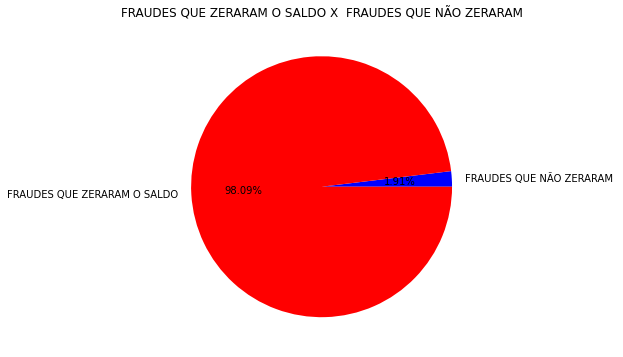

In [ ]:
#gráfico  FRAUDES QUE ZERARAM O SALDO X  FRAUDES QUE NÃO ZERARAM  /LUIZ
plt.rcParams['figure.figsize'] = (6,6)
plt.pie([tf-f0, tf], labels=['FRAUDES QUE NÃO ZERARAM ', 'FRAUDES QUE ZERARAM O SALDO'], colors=['blue', 'red'], autopct=lambda p: '{:.2f}'.format(p * 100.0 / 100)+'%')
plt.title('FRAUDES QUE ZERARAM O SALDO X  FRAUDES QUE NÃO ZERARAM')
plt.show()

Nota-se que das 8.213 fraudes, 8.053 pertencem ao conjundo de operações que zeraram o saldo na conta de origem, composto por 3.609.566 operações   /LUIZ

**ANÁLISE DO VALOR ENVOLVIDO NAS OPERAÇÕES** /LUIZ

In [ ]:
# QUANTIDDADE OPERAÇÕES QUE O SALDO INICIAL DE ORIGEM É IGUAL AO VALOR DA OPERAÇÃO  /LUIZ
so = np.sum(df.amount == df.oldbalanceOrg); so

8034

In [ ]:
# QUANTIDADE FRAUDES EM QUE O SALDO INICIAL DE ORIGEM É IGUAL AO VALOR DA OPERAÇÃO  /LUIZ
fo = np.sum((df.amount == df.oldbalanceOrg) & (df.isFraud  )); fo

8034

In [ ]:
# QUANTIDADE DE FRAUDES RESTANTES   /LUIZ
np.sum(df.isFraud)  - np.sum((df.amount == df['oldbalanceOrg']) & (df.isFraud  ))

179

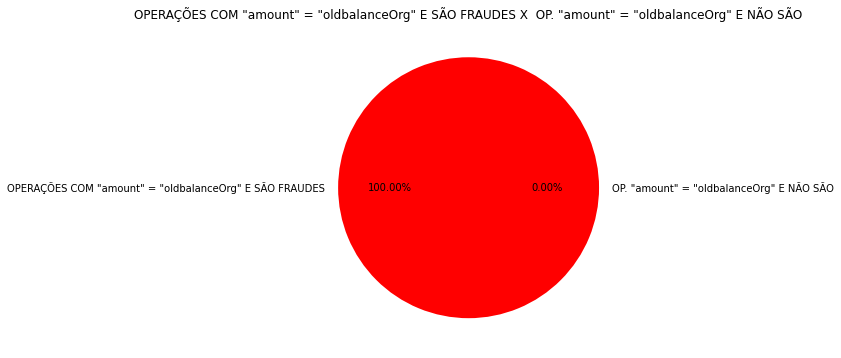

In [ ]:
#gráfico  OPERAÇÕES COM "amount" = "oldbalanceOrg" E SÃO FRAUDES X  OP. "amount" = "oldbalanceOrg" E NÃO SÃO /LUIZ
plt.rcParams['figure.figsize'] = (6,6)
plt.pie([so-fo, fo], labels=['OP. "amount" = "oldbalanceOrg" E NÃO SÃO', 'OPERAÇÕES COM "amount" = "oldbalanceOrg" E SÃO FRAUDES'], colors=['blue', 'red'], autopct=lambda p: '{:.2f}'.format(p * 100.0 / 100)+'%')
plt.title('OPERAÇÕES COM "amount" = "oldbalanceOrg" E SÃO FRAUDES X  OP. "amount" = "oldbalanceOrg" E NÃO SÃO')
plt.show()

**NOTA-SE QUE DAS 8213 FRAUDES, 8034 POSSUEM O SALDO INICIAL DE ORIGEM IGUAL AO VALOR DA OPERAÇÃO.** /LUIZ

 NÃO EXISTEM EXITEM OPERAÇÕES CUJO SALDO INICIAL DE ORIGEM É IGUAL AO VALOR DA OPERAÇÃO E NÃO SÃO FRAUDE.


**PORTANTO, O ALGORÍTMO INSERIU AS OPERAÇÕES DE FRAUDES SINTÉTICAS USANDO UMA REGRA MUITO SIMPLES**

**AS FRAUDES SÃO OPERAÇÕES CUJO SALDO INICIAL DE ORIGEM É IGUAL AO VALOR DA OPERAÇÃO.  /LUIZ**



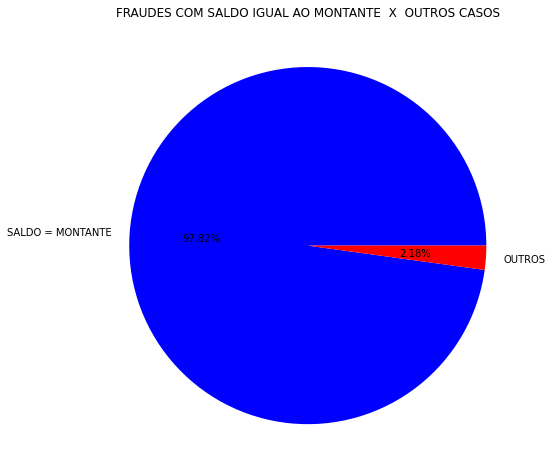

In [ ]:
#gráfico de quantidade fraudes com saldo inicial de origem igual ao valor da transação X demais fraudes   /LUIZ
plt.rcParams['figure.figsize'] = (8,10)
plt.pie([8034, 179], labels=['SALDO = MONTANTE', 'OUTROS'], colors=['blue', 'red'], autopct=lambda p: '{:.2f}'.format(p * 100.0 / 100)+'%')
plt.title('FRAUDES COM SALDO IGUAL AO MONTANTE  X  OUTROS CASOS')
plt.show()

In [ ]:
#MOSTRA OS OUTROS CASOS DE FRAUDE  /LUIZ
outros = df.query('((isFraud == 1) and (amount != oldbalanceOrg))')
outros

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.0,9291619.62,1,0
1911,1,CASH_OUT,132842.64,C13692003,4499.08,0.00,C297927961,0.0,132842.64,1,0
4440,4,TRANSFER,10000000.00,C7162498,12930418.44,2930418.44,C945327594,0.0,0.00,1,0
14861,8,CASH_OUT,181728.11,C2102265902,0.00,0.00,C789014007,11397.0,184477.77,1,0
25875,8,TRANSFER,1078013.76,C1026280121,0.00,0.00,C277510102,0.0,970749.68,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362528,736,TRANSFER,10000000.00,C412961249,11314660.84,1314660.84,C253674970,0.0,0.00,1,0
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.0,0.00,1,0
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.0,0.00,1,0
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.0,0.00,1,0


In [ ]:
# QUANTIDADE DE OPERAÇÕES COM MONTANTE IGUAL A 10.000.000 E SALDOS DE DESTINO ZERADOS /LUIZ
np.sum((df.amount == 10000000) & (df.oldbalanceDest == 0)  & (df.newbalanceDest == 0))

145

In [ ]:
# QUANTIDADE DE FRAUDES COM MONTANTE IGUAL A 10.000.000 E SALDOS DE DESTINO ZERADOS  /LUIZ
np.sum((df.amount == 10000000) & (df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.isFraud) )

145

**PORTANTO, destas 179 outras fraudes, 145 possuem "montante" = 10.000.000 e ausência de saldos de destino** (oldbalanceDest = 0 e newbalanceDest = 0). /LUIZ

**Restam apenas 34 casos de fraude não incluidas nos dois conjuntos anteriores, que além de insignificantes, podem ter sido inseridas aleatóriamente. /LUIZ**

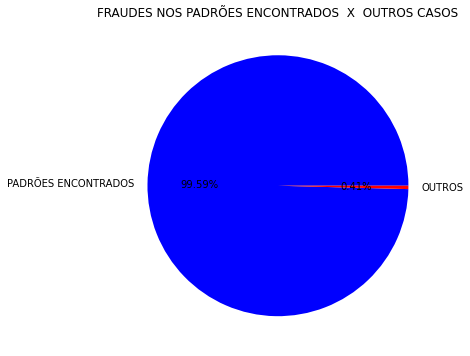

In [ ]:
#gráfico de quantidade fraudes nos 2 padrões encontrados X outras fraudes   /LUIZ
plt.rcParams['figure.figsize'] = (8,6)
plt.pie([8179, 34], labels=['PADRÕES ENCONTRADOS', 'OUTROS'], colors=['blue', 'red'], autopct=lambda p: '{:.2f}'.format(p * 100.0 / 100)+'%' )
plt.title('FRAUDES NOS PADRÕES ENCONTRADOS  X  OUTROS CASOS')
plt.show()

In [ ]:
#MOSTRA OS OUTROS 34 CASOS DE FRAUDE   /LUIZ
outros34 = outros.query('(amount != 10000000)')
outros34

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.00,9291619.62,1,0
1911,1,CASH_OUT,132842.64,C13692003,4499.08,0.00,C297927961,0.00,132842.64,1,0
14861,8,CASH_OUT,181728.11,C2102265902,0.00,0.00,C789014007,11397.00,184477.77,1,0
25875,8,TRANSFER,1078013.76,C1026280121,0.00,0.00,C277510102,0.00,970749.68,1,0
60853,9,TRANSFER,994453.20,C1121789613,1437370.87,442917.67,C254839817,194812.76,665743.67,1,0
77745,10,CASH_OUT,277970.88,C489647033,0.00,0.00,C571514738,0.00,277970.88,1,0
138559,11,TRANSFER,1933920.80,C1706582969,0.00,0.00,C461905695,1283762.85,3217683.65,1,0
169998,12,CASH_OUT,149668.66,C227115333,0.00,0.00,C460735540,44170.11,193838.76,1,0
178668,12,CASH_OUT,222048.71,C265790428,0.00,0.00,C1700442291,2979.00,225027.71,1,0
200845,13,CASH_OUT,454859.39,C1274887619,0.00,0.00,C2146670328,0.00,454859.39,1,0


**COM AS "ASSINATURAS" DAS 34 OUPERAÇÕES RESTANTES, É POSSÍVEL INCLUÍLAS EM UM CONJUNTO DE 34 OPERAÇÕES. /LUIZ**

**ENTÃO, UMA SIMPLES ÁRVORE DE REGRAS QUEBRA O ALGORITMO QUE INSERIU AS FRAUDES, DETECTANDO TODAS AS FRAUDES DESTA BASE DE DADOS /LUIZ**

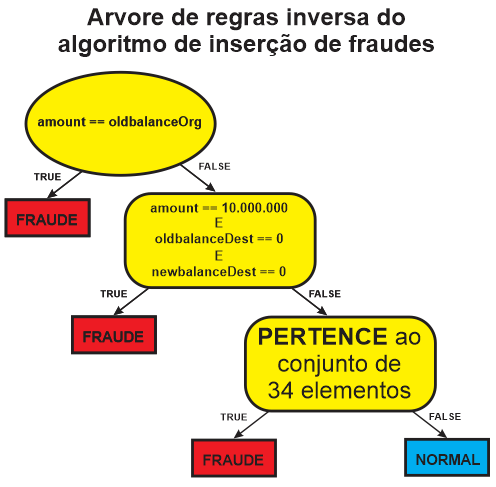

In [ ]:
# 34 MONTANTES QUE PODEM INDICAR FRAUDES   /LUIZ
c34 =  outros34.query('((amount != 10000000) )').amount.to_list()

In [ ]:
# 2 "NOVO SALDO DE DESTINO" QUE DIFERENCIA 2 OPERAÇÕES NORMAIS QUE POSSUEM O MESMO MONTANTE DE UMA FRAUDE  /LUIZ
d2 = [2587228.90, 431223.10]

In [ ]:
#FUNÇÃO QUE INDICA 100% DAS FRAUDES NESTA BASE DE DADOS SINTÉTICA  /LUIZ
def verificaFraude(amount, oldbalanceOrg, oldbalanceDest, newbalanceDest ):
    if (amount == oldbalanceOrg):
        return True
    if ((amount == 10000000) and (oldbalanceDest == 0) and (newbalanceDest == 0)):
        return True
    if ((amount in c34) and (newbalanceDest not in d2)):
        return True
    return False

In [ ]:
#CÓDIGO MUITO DEMORADO (MAIS DE 10 minutos), RECOMENDADO NÃO EXECUTAR DE NOVO   /LUIZ
# TESTE EM TODA A BASE DE DADOS   /LUIZ
qtdFraudesDetectadas = 0
qtdFraudesConfirmadas = 0
for index, row in df.iterrows():
    if verificaFraude(row.amount, row.oldbalanceOrg, row.oldbalanceDest, row.newbalanceDest):
        qtdFraudesDetectadas += 1
    if row.isFraud:
        qtdFraudesConfirmadas += 1
print('Fraudes detectadas: '+str(qtdFraudesDetectadas) + '\nFraudes que realmente ocorreram: '+str(qtdFraudesConfirmadas))


Fraudes detectadas: 8213
Freudes que realmente ocorreram: 8213


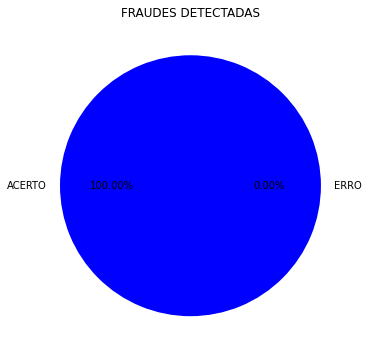

In [ ]:
#gráfico de ACERTO DE fraudes DETECTADAS   /LUIZ
plt.pie([qtdFraudesDetectadas, qtdFraudesConfirmadas - qtdFraudesDetectadas], labels=['ACERTO', 'ERRO'], colors=['blue', 'red'], autopct=lambda p: '{:.2f}'.format(p * 100.0 / 100)+'%')
plt.title('FRAUDES DETECTADAS')
plt.show()

# CONCLUSÃO DA ANÁLISE

Apesar de sinalizar de possibilidade de fraude sempre ter acertado a fraude, a sinalização de fraude só foi levantada 16 vezes dentre os 6.362.620 registros. Existem muitas operações com montantes suiperiores à 200.000 que não foram sinalizadas. Portanto esta sinalização não tem consistência, nem representatividade e, então, pode ser descartada do modelo a ser implementado.

A maioria das fraudes com transferência não tem informações sobre o saldo da conta de destino.

Com excessão de 1 operação, todas as saídas de dinheiro fraudolentas resultaram em novo saldo de origem (newbalanceOrig) zerado.

Os saldos de destino podem apresentar inconsistências de valores com a transação.

Em um uso real, os campos "nameOrig" e "nameDest" poderiam ajudar a identificar os fraudadores. Já para a detecção de fraude nesta base de dados específica, eles não tem relevância e aparerentam, inclusive, ter valores aleatórios.

**FORAM ENCONTRADOS 2 PADRÕES DO ALGORITMO QUE INSERIU FRAUDES SINTÉTICAS**

NOTA-SE QUE DAS 8213 FRAUDES, 8034 POSSUEM O SALDO INICIAL DE ORIGEM (oldbalanceOrg) IGUAL AO MONTANTE DA OPERAÇÃO (amount).

**PRIMEIRO PADRÃO:**

**SEMPRE QUE O SALDO INICIAL DE ORIGEM (oldbalanceOrg) É IGUAL AO MONTANTE (amount) DA OPERAÇÃO, ENTÃO É FRAUDE!**

**UM SEGUNDO PADRÃO:**

**Das 179 outras fraudes não incluídas no primeiro padrão, 145 possuem "montante" = 10.000.000 e ausência de saldos de destino (oldbalanceDest = 0 e newbalanceDest = 0)**


**A MAIORIA DE 99,59% DAS FRAUDES FORAM GERADAS POR 2 PADRÕES SIMPLES DE MARCAÇÕES COMO FRAUDE.** 

Os 0,41% restantes (34 operações) aparentam ser inserções aleatórias nos grupos de "transferência" ou "saida de dinheiro".

**COM AS "ASSINATURAS" DAS 34 OPERAÇÕES RESTANTES, É POSSÍVEL INCLUÍLAS EM UM CONJUNTO DE 34 OPERAÇÕES.**


**ENTÃO, UMA SIMPLES ÁRVORE COM 3 REGRAS QUEBRA O ALGORITMO QUE INSERIU AS FRAUDES, DETECTANDO TODAS AS FRAUDES DESTA BASE DE DADOS. Por ser baseada em todo o espaço amostral, ela possui tudo que é preciso para a detecção. Porém em outras amostras, com outros padrões, já não conseguiria detectar.**


**PORTANTO, ESTÁ QUEBRADO O ALGORÍTMO QUE INSERIU OPERAÇÕES DE FRAUDES SINTÉTICAS. Ou seja, foram descobertos os padrões usados para inserir as fraudes sintéticas.**

Essa base de dados sintética foi criada por regras simples, principalmente o montante ser igual ao saldo. Então não serve de base para detecção de fraudes no mundo real, pois no mundo real e em transações normais é comum o montante da operação ser igual ao saldo da conta. Já nestes dados, sempre que isso ocorre, significa fraude. 
 
